In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [7]:
df = pd.read_csv('/content/drive/MyDrive/bài tập colab/CSV/OnlineRetail.csv',encoding = "ISO-8859-1")

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<ipython-input-11-decea302a60f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['TotalPrice'] = df_2011['Quantity'] * df_2011['UnitPrice']


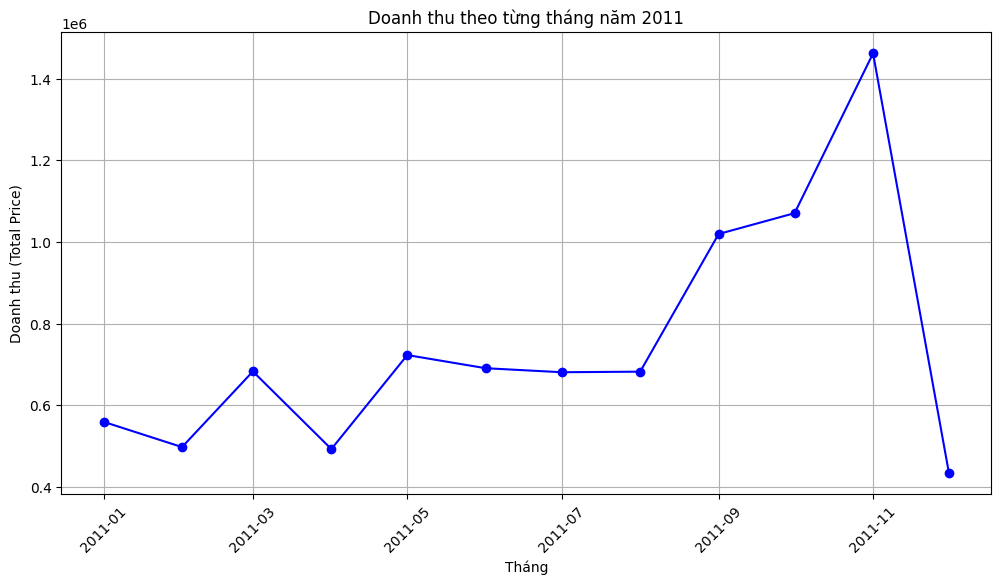

In [11]:

# Chuyển đổi cột 'InvoiceDate' về kiểu datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Bước 2: Lọc dữ liệu năm 2011
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

# Tính cột 'TotalPrice' (Doanh thu = Quantity * UnitPrice)
df_2011['TotalPrice'] = df_2011['Quantity'] * df_2011['UnitPrice']

# Bước 3: Tính doanh thu theo từng tháng
monthly_revenue = df_2011.groupby(df_2011['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

# Bước 4: Đếm số lượng đơn hàng theo từng tháng
monthly_orders = df_2011.groupby(df_2011['InvoiceDate'].dt.to_period('M'))['InvoiceNo'].nunique()

# Bước 5: Vẽ biểu đồ

# Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index.to_timestamp(), monthly_revenue.values, marker='o', linestyle='-', color='b')
plt.title('Doanh thu theo từng tháng năm 2011')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu (Total Price)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

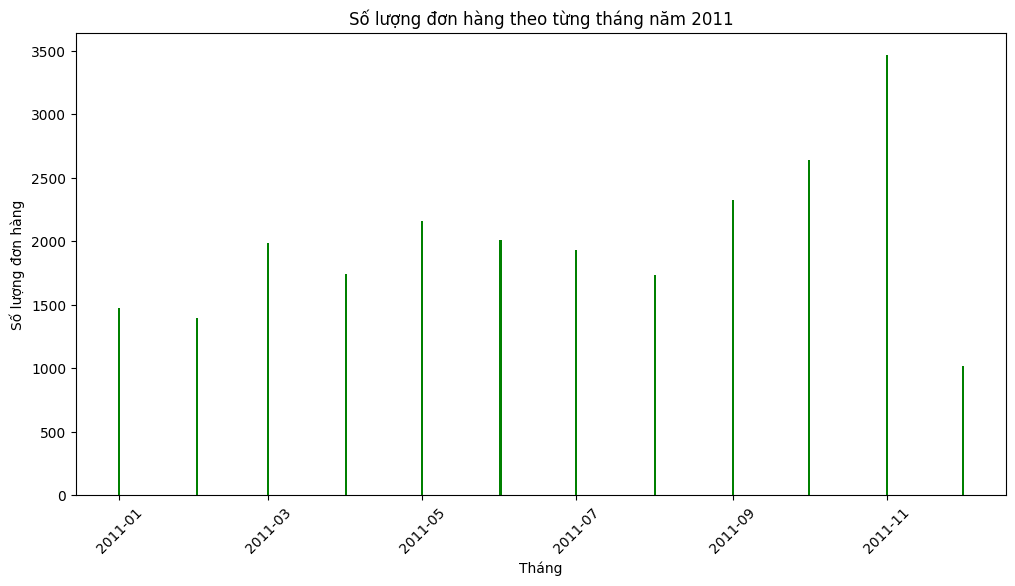

In [12]:
# Biểu đồ cột thể hiện số lượng đơn hàng trong các tháng của năm 2011
plt.figure(figsize=(12, 6))
plt.bar(monthly_orders.index.to_timestamp(), monthly_orders.values, color='g')
plt.title('Số lượng đơn hàng theo từng tháng năm 2011')
plt.xlabel('Tháng')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=45)
plt.show()

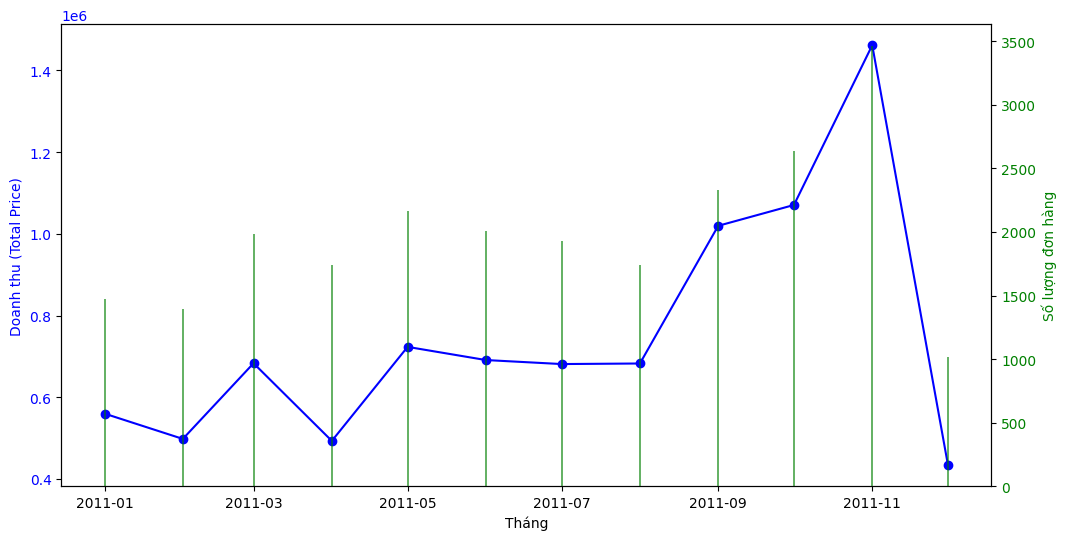

In [13]:
# Bước 5: Vẽ biểu đồ kết hợp
fig, ax1 = plt.subplots(figsize=(12, 6))

# Biểu đồ đường thể hiện doanh thu theo từng tháng
ax1.plot(monthly_revenue.index.to_timestamp(), monthly_revenue.values, marker='o', linestyle='-', color='b', label='Doanh thu')
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Doanh thu (Total Price)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Biểu đồ cột thể hiện số lượng đơn hàng theo từng tháng
ax2 = ax1.twinx()
ax2.bar(monthly_orders.index.to_timestamp(), monthly_orders.values, color='g', alpha=0.6, label='Số lượng đơn hàng')
ax2.set_ylabel('Số lượng đơn hàng', color='g')
ax2.tick_params(axis='y', labelcolor='g')
